 ## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [2]:
df1 = pd.read_csv("Table S1.csv", skiprows=1, header = 0)
df2 = pd.read_csv("Table S2.csv", skiprows=1, header = 0)
df3 = pd.read_csv("Table S3.csv", skiprows=1, header = 0)

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2988, 28)
(418, 24)
(52, 25)


### Checking for class imbalance

In [4]:
df1['Comment'].value_counts()

Barren       1687
Fertility    1301
Name: Comment, dtype: int64

In [5]:
# sampling the data
df1.sample(3)

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1884,Rohrlach 2002; Lu et al. 2016,Tampakan,NaN,NaN,R05044A_R_5,3.8,7.7,Fertility,1,7.00,...,14.52,6.23,36.00,8.65,87.8,22.70,213.30,8392.0,36.80,21.10
2830,"Wotzlaw et al, 2019",Yellowstone,NaN,NaN,"z3.2, rim",2.1,NaN,Barren,0,9.56,...,72.20,28.20,123.00,24.40,215.0,37.80,787.00,9073.0,161.00,59.50
437,[21561] HUANG CHUNMEI (2017),CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY /...,28.0,91.0,"LEUCOGRANITE, TOURMALINE",18.0,NaN,Barren,0,5.59,...,106.98,28.89,111.63,23.12,222.1,39.51,905.14,12169.0,2254.14,116.13


In [6]:
# Prints the columns present in the dataframe
df1.columns

Index(['CITATION', 'LOCATION', 'LATITUDE (MIN.)', 'LONGITUDE (MIN.)',
       'ROCK NAME', 'AGE(MA)', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [7]:
df2.columns

Index(['Sample No.', 'Rock type', 'Zricon ID', 'Age', 'Ti', 'Ce', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [8]:
df2.sample(3)

,Sample No.,Rock type,Zricon ID,Age,Ti,Ce,Nd,Sm,Eu,Gd,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
35,SM059,Guichon sub-facies,RLP2L2-12,210.77,13.0,12.91,1.42,3.36,0.647,16.4,...,23.30,209.0,42.60,723.0,10090,198.707205,0.249958,0.000346,9.091549,0.012575
355,SM060,Jersey Stock,RLP1L4-5C,208.00,9.0,8.95,1.30,3.25,0.860,12.5,...,19.15,179.3,39.60,554.0,11010,149.356671,0.390635,0.000705,6.884615,0.012427
114,SM056,Bethlehem porphyry,RLP2L6-16,209.00,8.7,7.70,0.53,1.30,0.416,6.6,...,13.22,128.6,27.56,360.0,8950,480.227979,0.381491,0.001060,14.528302,0.040356


In [9]:
df3.columns

Index(['Sample', 'Analysis number', 'Location', 'Age (Ma)', 'Ti', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [10]:
df3.sample(3)

,Sample,Analysis number,Location,Age (Ma),Ti,Ce,Pr,Nd,Sm,Eu,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
14,KMQ-12-2,KMQ12-2_2,Kangmaqie,51,18.873308,13.38,0.2914,5.623,12.270,1.8320,...,54.68,484.6,75.99,2003.0,9433.788599,31.647266,0.205384,0.000103,2.379513,0.001188
7,NM11-01,NM1101-_5,Nanmu,52,32.058852,36.08,0.5088,8.050,26.040,5.1370,...,77.45,792.3,267.00,2205.0,16915.524940,86.693514,0.377847,0.000171,4.481988,0.002033
1,QS-11,QS11-05_4,Quxu,53,9.763296,28.14,0.8083,2.216,3.517,0.5253,...,32.19,426.9,89.42,710.7,14084.116390,559.286353,0.165246,0.000233,12.698556,0.017868


### Analysing the column Sample No in dataframes 2 and 3.

In [11]:
df2['Sample No.'].value_counts()

MA026    57
SM060    46
SM061    39
MA121    30
SM056    29
SB123    28
SM057    27
SM058    25
MA038    23
SB217    23
MA099    22
SB218    21
SM055    20
SM059    18
KB132    10
Name: Sample No., dtype: int64

In [12]:
df3['Sample'].value_counts()

PZ11-03     9
PG11-03     6
NM11-01     5
WR-12-11    5
KMQ-12-2    5
JM11-36     5
PG11-06     5
JR11-06     4
QS-11       3
JR-2        3
JR-5        2
Name: Sample, dtype: int64

### Working with dataframe 1

In [13]:
# Print the first 5 rows of the dataframe
df1.head()

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,6.00,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,9.06,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,4.93,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [14]:
### Number of Cu deposits based on location

In [15]:
group_by_loc = sqldf("""
                        SELECT LOCATION AS location, COUNT(*) AS num_deposits
                        FROM df1
                        GROUP BY LOCATION
                        ORDER BY LOCATION

                     """)

In [16]:
group_by_loc

,location,num_deposits
0,ALEUTIAN ARC / CENTRAL ALEUTIAN ARC / ADAK / H...,11
1,Aktogai,8
2,BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...,168
3,Baogutu,6
4,Batu Hijau,63
...,...,...
59,Tuwu-Yandong,29
60,YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...,107
61,Yellowstone,18
62,Younger Toba Tuff,20


### Null Values

In [17]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt       1687
LATITUDE (MIN.)     1522
LONGITUDE (MIN.)    1522
La                   923
Pr                   256
Ti                   255
ROCK NAME            124
AGE(MA)              124
Nd                    93
Er                    79
Tm                    78
Y                     74
Hf                    25
Eu                    15
Sm                     8
Gd                     6
Ce                     5
Dy                     3
Lu                     2
Tb                     1
Ho                     1
Yb                     1
U                      0
CITATION               0
LOCATION               0
Feature                0
Comment                0
Th                     0
dtype: int64

### Renaming the columns for ease of working

In [18]:
df1.rename(columns = {'LOCATION': 'location', 
                      'LATITUDE (MIN.)':'latitude', 
                      'LONGITUDE (MIN.)':'longitude', 
                      'ROCK NAME':'rock_name', 
                      'AGE(MA)':'age_ma'}, inplace=True)

In [19]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [20]:
### Checking the latitude column for null values

In [21]:
null_lat_rec = sqldf("""
                        SELECT location, COUNT(*)
                        FROM df1
                        WHERE latitude IS NULL
                        GROUP BY location

                     """)

In [22]:
null_lat_rec

,location,COUNT(*)
0,Aktogai,8
1,Baogutu,6
2,Batu Hijau,63
3,Bishop,19
4,Borly,5
5,Bozshakol,17
6,Chuquicamata,30
7,Chuquicamata-Rad,123
8,Dexing,48
9,El Abra,9


### Data Collection for missing latitude and longitude

In [23]:
coordinates_map = {
    'Aktogai':[46, 80],
    'Baogutu':[45, 84],
    'Batu Hijau':[-9, 117],
    'Bishop':[37, -118],
    'Borly':[48, -76],
    'Bozshakol':[51, 72],
    'Chuquicamata':[-22, -67],
    'Chuquicamata-Rad':[-22, -67],
    'Dexing':[28, 117],
    'El Abra':[-22, -68],
    'El Salvador':[-26, -70],
    'El Teniente':[-34, -70],
    'Erdenet':[49, 104],
    'Heruga':[43, 106],
    'Hugo Dummett':[43, 106],
    'Jiama':[35, 105],
    'Koksai':[44, 78],
    'Kounrad':[47, 75],
    'NChuquicamata-Rad':[-22, -67],
    'Nurkazghan':[50, 73],
    'Opache':[-22, -67],
    'Oyu Tolgoi':[43, 106],
    'Qulong':[30, 92],
    'Radomiro Tomic':[-22, -67],
    'Red Chris':[58, -130],
    'Sar Cheshmeh':[30, 56],
    'Shujiadian':[33, 110],
    'Sungun':[38, 46],
    'Tampakan':[6, 125],
    'Tintaya':[-15, -71],
    'Tuwu-Yandong':[42, 93],
    'Yellowstone':[45, 111],
    'Younger Toba Tuff':[3, 99],
    'Yulong':[31, 98]
}

In [24]:
### Functions to fill missing latitude and longitude values

In [25]:
def set_latitude(location):
    return coordinates_map[location][0]

def set_longitude(location):
    return coordinates_map[location][1]

In [26]:
df1['location'] = df1['location'].apply(str.strip)

In [27]:
null_latitude_rec = df1[df1['latitude'].isnull()]
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,NaN,NaN,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,NaN,NaN,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,NaN,NaN,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,NaN,NaN,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,NaN,NaN,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


### Invoking the functions to replace missing latitudes and longitudes

In [28]:
null_latitude_rec['latitude'] = null_latitude_rec['latitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_latitude))

null_latitude_rec['longitude'] = null_latitude_rec['longitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_longitude))

In [29]:
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,48.0,-76.0,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,48.0,-76.0,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,48.0,-76.0,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,48.0,-76.0,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,48.0,-76.0,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [30]:
df1.loc[null_latitude_rec.index, 'latitude'] = null_latitude_rec['latitude']
df1.loc[null_latitude_rec.index, 'longitude'] = null_latitude_rec['longitude']

In [31]:
print('Latitude nulls: ', df1['latitude'].isna().sum())
print('Longitude nulls: ', df1['longitude'].isna().sum())

Latitude nulls:  0
Longitude nulls:  0


### Replace "Cu_Tonnage" for Barren ores with 0.0

In [32]:
df1.loc[df1['Comment'] == 'Barren', 'Cu_tonnage_Mt'] = 0.0

### Just the trace elements left for handling nulls

In [33]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
rock_name        124
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
CITATION           0
location           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
latitude           0
Th                 0
dtype: int64

### Mean Values of trace elements based on type of ore: Barren or Fertility

In [34]:
sqldf("""
            
          SELECT Comment, AVG(La), AVG(Pr), AVG(Ti), AVG(age_ma), AVG(Nd), AVG(Er), AVG(Tm), AVG(Y), AVG(Hf),
                          AVG(Eu), AVG(Sm), AVG(Gd), AVG(Ce), AVG(Dy), AVG(Lu), AVG(Yb), AVG(Tb), AVG(Ho)
          FROM df1
          GROUP BY Comment
        
      """)

,Comment,AVG(La),AVG(Pr),AVG(Ti),AVG(age_ma),AVG(Nd),AVG(Er),AVG(Tm),AVG(Y),AVG(Hf),AVG(Eu),AVG(Sm),AVG(Gd),AVG(Ce),AVG(Dy),AVG(Lu),AVG(Yb),AVG(Tb),AVG(Ho)
0,Barren,5.496975,2.803270,38.320030,556.602423,12.349263,320.348590,72.562911,2154.694014,11113.827390,1.481066,11.697207,47.258081,35.642595,213.756964,121.309176,649.943063,18.653674,74.816806
1,Fertility,0.234889,0.123007,6.714327,201.778094,1.367614,125.670413,30.266185,769.383452,8854.285237,1.016840,2.535607,15.371648,21.207080,54.388516,66.430931,325.240032,6.329784,29.417486


In [35]:
### Missing "rock_name" records belong to BARREN type.

In [36]:
sqldf("""
            
            SELECT Comment, COUNT(*) AS count
            FROM df1
            WHERE rock_name IS NULL
            GROUP BY Comment

      """)

,Comment,count
0,Barren,124


In [37]:
df1.loc[df1['Comment'] == 'Barren'].head(2)

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0


In [38]:
# Notice that a few of the Barren ores contain rock_name. A good approach is to fill the missing values with mode.
# In Addition, there is a category by the name "NOT GIVEN". We can even choose to replace nulls with it.

In [39]:
df1.loc[df1['Comment'] == 'Barren']['rock_name'].value_counts()

GRANITE              524
NOT GIVEN            214
GRANITE, RAPAKIVI    168
ANDESITE             107
GNEISS                88
                    ... 
RC13-78_56             1
RC13-78_34             1
RC13-78_33             1
RC13-78_31             1
TTZ1-58                1
Name: rock_name, Length: 115, dtype: int64

In [40]:
### All missing rock_name records belong to one location: "Chuquicamata-Rad"

In [41]:
df1.loc[df1['rock_name'].isnull()][['Comment', 'rock_name', 'age_ma', 'location']]

,Comment,rock_name,age_ma,location
2864,Barren,NaN,NaN,NChuquicamata-Rad
2865,Barren,NaN,NaN,Chuquicamata-Rad
2866,Barren,NaN,NaN,Chuquicamata-Rad
2867,Barren,NaN,NaN,Chuquicamata-Rad
2868,Barren,NaN,NaN,Chuquicamata-Rad
...,...,...,...,...
2983,Barren,NaN,NaN,Chuquicamata-Rad
2984,Barren,NaN,NaN,Chuquicamata-Rad
2985,Barren,NaN,NaN,Chuquicamata-Rad
2986,Barren,NaN,NaN,Chuquicamata-Rad


In [42]:
sqldf("""
            SELECT location, age_ma, Comment, rock_name, latitude, longitude
            FROM df1
            WHERE location = 'Chuquicamata'
            
     """)

,location,age_ma,Comment,rock_name,latitude,longitude
0,Chuquicamata,35.0,Fertility,610-01,-22.0,-67.0
1,Chuquicamata,35.0,Fertility,610-02,-22.0,-67.0
2,Chuquicamata,35.0,Fertility,610-03,-22.0,-67.0
3,Chuquicamata,35.0,Fertility,610-04,-22.0,-67.0
4,Chuquicamata,35.0,Fertility,610-05,-22.0,-67.0
5,Chuquicamata,35.0,Fertility,610-06,-22.0,-67.0
6,Chuquicamata,35.0,Fertility,610-07,-22.0,-67.0
7,Chuquicamata,35.0,Fertility,610-08,-22.0,-67.0
8,Chuquicamata,35.0,Fertility,610-09,-22.0,-67.0
9,Chuquicamata,35.0,Fertility,610-10,-22.0,-67.0


In [43]:
df1.loc[df1['location'] == 'NChuquicamata-Rad', 'location'] = 'Chuquicamata-Rad'

In [44]:
df1['location'].value_counts()

Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu                 

In [45]:
### Age_ma missing values

In [46]:
null_age = sqldf("""
                      SELECT location, Comment  
                      FROM df1
                      WHERE age_ma IS NULL
                  """)

In [47]:
null_age['Comment'].value_counts()

Barren    124
Name: Comment, dtype: int64

In [48]:
null_age

,location,Comment
0,Chuquicamata-Rad,Barren
1,Chuquicamata-Rad,Barren
2,Chuquicamata-Rad,Barren
3,Chuquicamata-Rad,Barren
4,Chuquicamata-Rad,Barren
...,...,...
119,Chuquicamata-Rad,Barren
120,Chuquicamata-Rad,Barren
121,Chuquicamata-Rad,Barren
122,Chuquicamata-Rad,Barren


In [49]:
null_age['location'].value_counts()

Chuquicamata-Rad    124
Name: location, dtype: int64

In [50]:
df1['age_ma'].sample(20)

676      253.000000
1471     313.000000
1122    2504.000000
1599      16.000000
902     1639.567177
2465     370.000000
822     1663.424177
1996      36.000000
1590      16.000000
1120    2465.000000
975      122.733809
2566     370.000000
440       16.000000
1280     124.000000
2547     370.000000
1345     757.000000
2870            NaN
451       15.000000
2185       5.700000
698      275.000000
Name: age_ma, dtype: float64

### Plotting the Distributions

<Axes: xlabel='age_ma', ylabel='Density'>

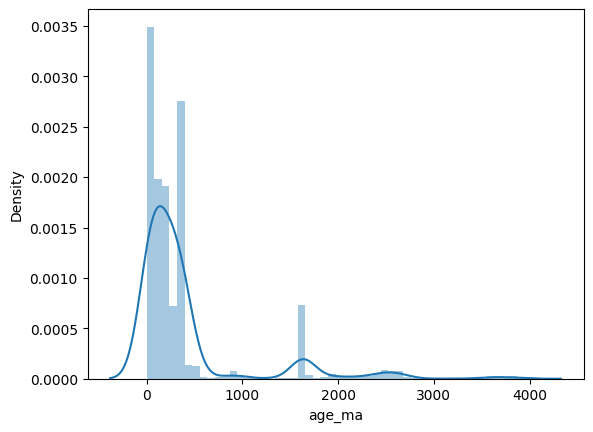

In [51]:
import seaborn as sns
sns.distplot(df1['age_ma'])

In [52]:
barren_age = sqldf("""
                  SELECT age_ma, LOCATION  
                  FROM df1
                  WHERE Comment = 'Barren'

                  """)

In [53]:
barren_age

,age_ma,location
0,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
1,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
2,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
3,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
4,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
...,...,...
1682,NaN,Chuquicamata-Rad
1683,NaN,Chuquicamata-Rad
1684,NaN,Chuquicamata-Rad
1685,NaN,Chuquicamata-Rad


<Axes: xlabel='age_ma', ylabel='Density'>

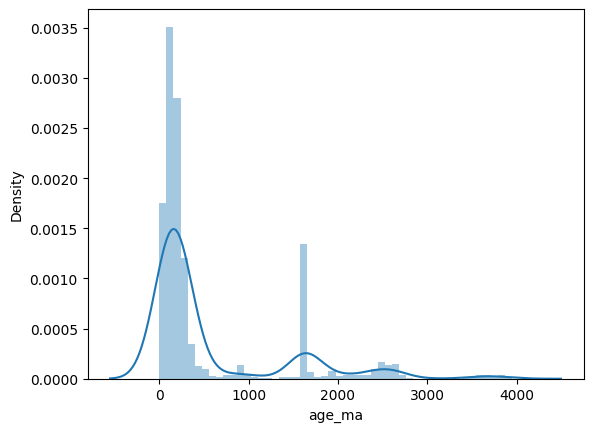

In [54]:
sns.distplot(barren_age['age_ma'])

In [55]:
print(barren_age['age_ma'].mean())

556.6024229734869


In [56]:
print(barren_age['age_ma'].median())

222.0


In [57]:
fertile_age = sqldf("""
                      SELECT age_ma, LOCATION  
                      FROM df1
                      WHERE Comment = 'Fertility'
                  """)

<Axes: xlabel='age_ma', ylabel='Density'>

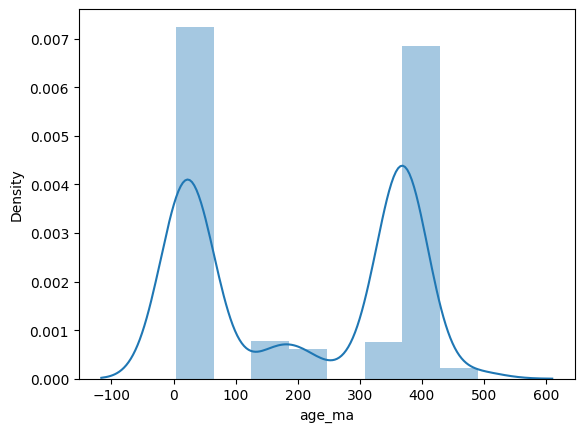

In [58]:
sns.distplot(fertile_age['age_ma'])

<Axes: xlabel='Hf', ylabel='Density'>

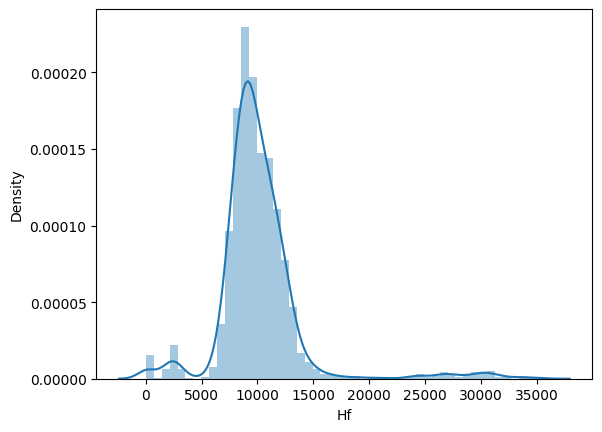

In [59]:
sns.distplot(df1['Hf'])

<Axes: >

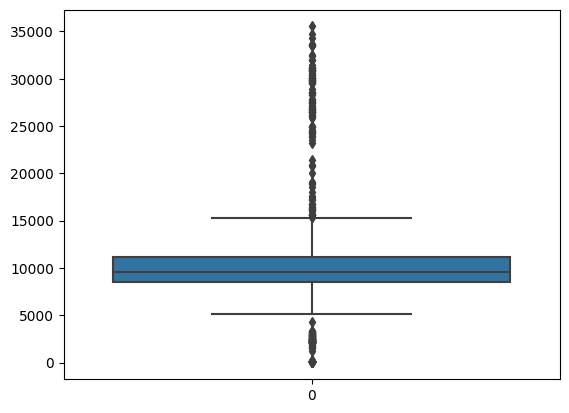

In [60]:
sns.boxplot(df1['Hf'])

In [61]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [62]:
df1.drop(columns=['CITATION', 'rock_name'], inplace=True)

In [63]:
df1.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [64]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
location           0
latitude           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
Th                 0
dtype: int64

In [65]:
df1_copy = df1.copy()

In [107]:
def replace_nulls(df, feature):
    barren_median = df1[df1['Comment'] == 'Barren'][feature].median()
    fertile_median = df1[df1['Comment'] == 'Fertility'][feature].median()
    
    print(feature, barren_median, fertile_median)
    
    df[feature] = np.where((df[feature].isnull()) & (df['Comment'] == 'Barren'), 
                                 barren_median.astype(float), 
                                 fertile_median.astype(float)
                                )
    
    return df[feature]

In [105]:
features = ['Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
            'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

In [106]:
df1_copy.dtypes

location          object
latitude         float64
longitude        float64
age_ma           float64
Cu_tonnage_Mt    float64
Comment           object
Feature            int64
Ti               float64
La               float64
Ce               float64
Pr               float64
Nd               float64
Sm               float64
Eu               float64
Gd               float64
Tb               float64
Dy               float64
Ho               float64
Er               float64
Tm               float64
Yb               float64
Lu               float64
Y                float64
Hf               float64
U                float64
Th               float64
dtype: object

In [109]:
for feature in features:    
    df1_copy[feature] = replace_nulls(df1_copy, feature)

Ti 9.728431202 5.55
La 0.190204577 0.0395872595
Ce 16.472930945 13.01863289
Pr 0.20350000000000001 0.0652387115
Nd 2.56 0.7761290240000001
Sm 4.462581147 1.656829076
Eu 0.615 0.69
Gd 23.81275901 10.727599145
Tb 8.565000000000001 3.812409199
Dy 101.14 43.3
Ho 39.100474075 20.5
Er 175.11 102.0
Tm 40.205 25.21491394
Yb 390.54499999999996 282.0
Lu 73.83979123 59.28062439
Y 1117.6843939999999 630.0
Hf 10643.0 8929.0
U 292.0 119.1959828
Th 162.5 60.69745636


In [110]:
df1_copy.isnull().sum()

location           0
latitude           0
longitude          0
age_ma           124
Cu_tonnage_Mt      0
Comment            0
Feature            0
Ti                 0
La                 0
Ce                 0
Pr                 0
Nd                 0
Sm                 0
Eu                 0
Gd                 0
Tb                 0
Dy                 0
Ho                 0
Er                 0
Tm                 0
Yb                 0
Lu                 0
Y                  0
Hf                 0
U                  0
Th                 0
dtype: int64

In [112]:
df1_copy.loc[df1_copy['age_ma'].isnull()]

,location,latitude,longitude,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,La,Ce,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2864,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2865,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2866,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2867,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2868,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2984,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2985,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2986,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,5.55,0.039587,13.018633,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456


In [125]:
df1_copy.loc[df1_copy['location'] == 'Chuquicamata-Rad'] = 35.0

In [126]:
df1_copy.isna().sum()

location         0
latitude         0
longitude        0
age_ma           0
Cu_tonnage_Mt    0
Comment          0
Feature          0
Ti               0
La               0
Ce               0
Pr               0
Nd               0
Sm               0
Eu               0
Gd               0
Tb               0
Dy               0
Ho               0
Er               0
Tm               0
Yb               0
Lu               0
Y                0
Hf               0
U                0
Th               0
dtype: int64

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [128]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [129]:
X = df1_copy.drop(columns = ['location', 'Comment', 'Feature'])
y = df1_copy['Feature']

In [130]:
X.head()

,latitude,longitude,age_ma,Cu_tonnage_Mt,Ti,La,Ce,Pr,Nd,Sm,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,33.0,95.0,222.0,0.0,5.55,0.039587,13.018633,0.065239,0.776129,1.656829,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
1,33.0,95.0,222.0,0.0,5.55,0.039587,13.018633,0.065239,0.776129,1.656829,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
2,33.0,95.0,222.0,0.0,5.55,0.039587,13.018633,0.065239,0.776129,1.656829,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
3,33.0,95.0,222.0,0.0,5.55,0.039587,13.018633,0.065239,0.776129,1.656829,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456
4,33.0,95.0,222.0,0.0,5.55,0.039587,13.018633,0.065239,0.776129,1.656829,...,43.3,20.5,102.0,25.214914,282.0,59.280624,630.0,8929.0,119.195983,60.697456


In [131]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [133]:
type(X_train)

pandas.core.frame.DataFrame

In [134]:
lr_model = LogisticRegression()

In [135]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [140]:
y_pred = lr_model.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [141]:
accuracy_score(y_test, y_pred)

0.9983277591973244

In [142]:
confusion_matrix(y_test, y_pred)

array([[323,   0,   0],
       [  1, 252,   0],
       [  0,   0,  22]])

In [143]:
df1['location'].value_counts()

Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu                 

In [ ]:
#Testing
# Testing some change in dev branch
# Need to use Random Forest algo as well.